## Importing relevant libraries


In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
sns.set()  #overwrite default matplotlib settings with the default seaborn's settings 

#defining a chisq probability function
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
from scipy.stats import skew
from scipy.stats import kurtosis

### Loading the data into a Pandas Dataframe object

In [2]:
data = pd.read_csv( 'University_data.csv')
data.head(10) 

,SAT,Admitted,Gender
0,1363,No,Male
1,1792,Yes,Female
2,1954,Yes,Female
3,1653,No,Male
4,1593,No,Male
5,1755,Yes,Female
6,1775,Yes,Female
7,1887,Yes,Female
8,1893,Yes,Female
9,1580,No,Male


## Performing Some Exploratory Data Analysis 

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   SAT       168 non-null    int64 
 1   Admitted  168 non-null    object
 2   Gender    168 non-null    object
dtypes: int64(1), object(2)
memory usage: 4.1+ KB


In [4]:
data.Admitted.unique(), data.Gender.unique()

(array(['No', 'Yes'], dtype=object), array(['Male', 'Female'], dtype=object))

In [5]:
# Checking for the distribution in the columns of the dataset
data.describe(include='all')

,SAT,Admitted,Gender
count,168.000000,168,168
unique,NaN,2,2
top,NaN,Yes,Male
freq,NaN,94,90
mean,1695.273810,NaN,NaN
std,183.019017,NaN,NaN
min,1334.000000,NaN,NaN
25%,1547.500000,NaN,NaN
50%,1691.500000,NaN,NaN
75%,1844.500000,NaN,NaN


In [6]:
data.isnull().sum()

SAT         0
Admitted    0
Gender      0
dtype: int64

In [7]:
data.duplicated().sum()

13

/Users/orukotanoluwatobiloba/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'PDF of SAT Scores')

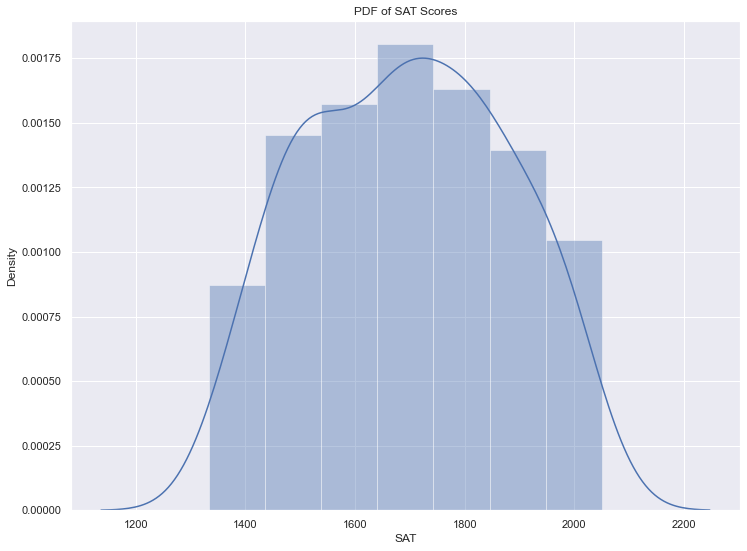

In [8]:
plt.figure(figsize=(12,9))
sns.distplot(data['SAT'])
plt.title("PDF of SAT Scores")

In [9]:
skew(data['SAT'], bias=False),kurtosis(data['SAT'], bias=False)

(0.007783763531823198, -1.0015069095653248)

In [10]:
def is_valid_column_in_dataset(column, dataset):
    """
    Returns True if:
                dataset is a pandas DataFrame object
                and column is a valid column in the dataset
    column  - feature title of type Str as argument
    dataset - pandas DataFrame object as argument
    """
    if isinstance(dataset, pd.DataFrame) and column in dataset.columns:
        return True
    else:
        print("Failed to pass the right arguments, see Docstring")
       

In [11]:
def count_plot(column,dataset):
    """
    column - Feature title of type Str
    dataset - DataFrame object
    plots a count-plot for the 'column' feature in a 'dataset'.
    
    """
    if is_valid_column_in_dataset(column=column,dataset=dataset):
        ax=sns.countplot(x=column, data=dataset, palette ='Set3')
    
        for p in ax.patches:
            ax.annotate(f'\n{p.get_height()}',
                       (p.get_x()+0.2, p.get_height()),
                       ha='center', va='top',
                       color='black', size=18)
        ax.set(title=column+"-Countplot");
    else:
        print("Error: Failed to pass the right arguments")

In [12]:
data['Gender'].value_counts()

Male      90
Female    78
Name: Gender, dtype: int64

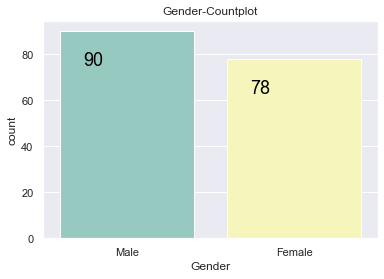

In [13]:
count_plot('Gender',data)

In [14]:
data['Admitted'].value_counts()

Yes    94
No     74
Name: Admitted, dtype: int64

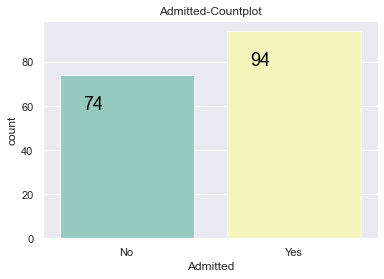

In [15]:
count_plot('Admitted',data)

<Figure size 864x720 with 0 Axes>

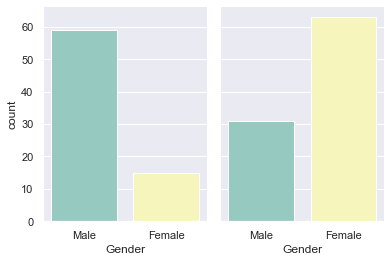

In [16]:
plt.figure(figsize=(12,10))
sns.catplot(x="Gender", col="Admitted",
            data=data, kind="count",
            height=4, aspect=.7,
            palette='Set3').set(title='');

/Users/orukotanoluwatobiloba/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/orukotanoluwatobiloba/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


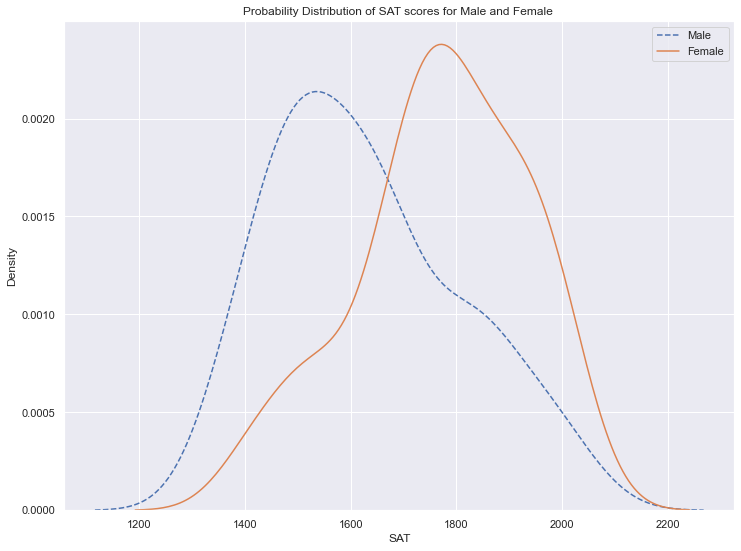

In [17]:
plt.figure(figsize=(12,9)) #put the next four plots in a function
sns.distplot(data[data['Gender']=='Male']['SAT'],
             hist=False,
             kde_kws={'linestyle':'--','label':'Male'})

sns.distplot(data[data['Gender']=='Female']['SAT'],
             hist=False,
             kde_kws={'linestyle':'-','label':'Female'})

plt.title('Probability Distribution of SAT scores for Male and Female ')
plt.legend()


In [18]:
skew(data[data['Gender']=='Male']['SAT']),skew(data[data['Gender']=='Female']['SAT'])

(0.4995477194031224, -0.44913255884790065)

In [19]:
def plot_probability_distribution(admission_status):
    """
    Plots two probability distribution curves.
    Each curve represents the distribution of scores for each gender.
    The admission_status parameter takes an argument 'Yes' or 'No' that filters the data.
    """
    plt.figure(figsize=(12,9))
    sns.distplot(data[(data['Gender']=='Male')&(data['Admitted']==admission_status)]['SAT'],
                 hist=False,
                 kde_kws={'linestyle':'--','label':'Male'})
    
    sns.distplot(data[(data['Gender']=='Female')&(data['Admitted']==admission_status)]['SAT'],
                 hist=False,
                 kde_kws={'linestyle':'-','label':'Female'})
    
    plt.title("Probability Distribution of SAT scores for Male and Female where 'admitted' = " + admission_status)
    plt.legend()
    

/Users/orukotanoluwatobiloba/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/orukotanoluwatobiloba/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


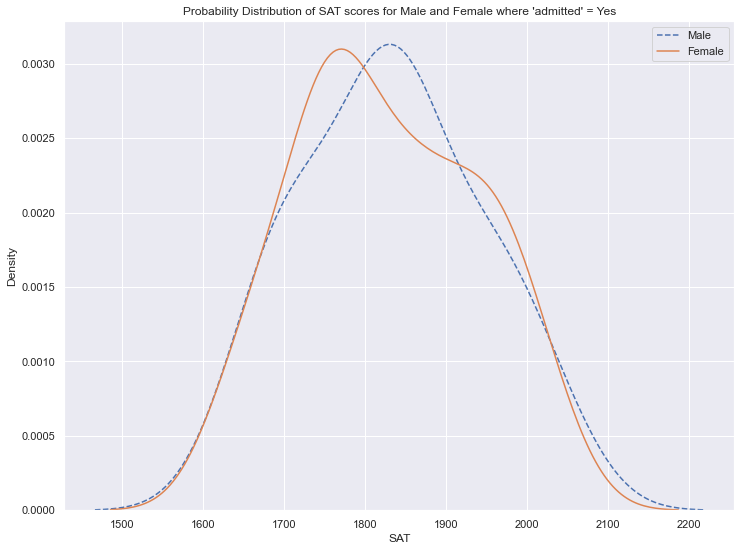

In [20]:
plot_probability_distribution('Yes')

/Users/orukotanoluwatobiloba/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/orukotanoluwatobiloba/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


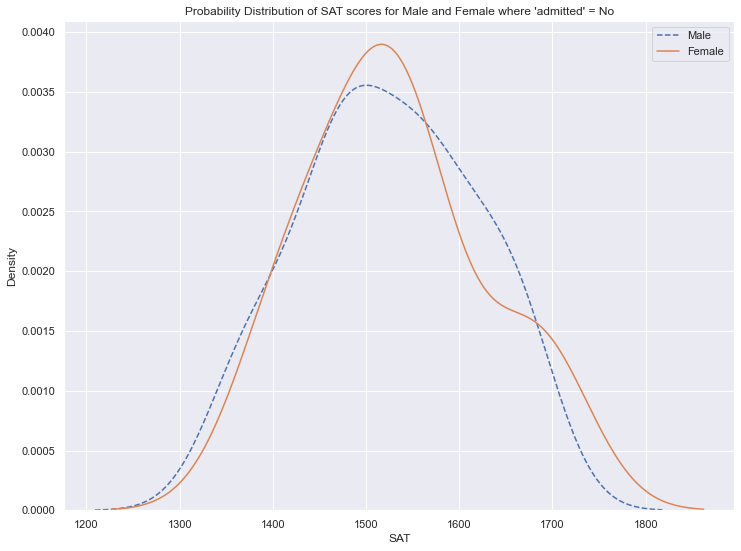

In [21]:
plot_probability_distribution('No')

In [22]:
def filter_data(Gender="Both Gender",low=1334,high=1800):
    """Returns dataframe filtered by gender and SAT scores
       Gender - "Male" or "Female" or "Both Gender"
       low, high - lower and higher bound of SAT score
    """
    df = data[(data['SAT']>=low) & (data['SAT']<=high)]
    if Gender=="Both Gender":
        return df
    return (df[df["Gender"]==Gender])

In [23]:
def print_report(Gender="Both Gender", low=1334, high=2050):
    df = filter_data(Gender=Gender,low=low,high=high)
    population = df.shape[0]
    if Gender=="Both Gender":
        admitted = df[(df['Admitted']=='Yes')].shape[0]
    else:
        admitted = df[(df['Gender']== Gender) & (df['Admitted']=='Yes')].shape[0]
    percentage = str(round(((admitted/population)*100),2))+'%'
    report_1 = " For scores between %d and %d\n"%(low, high)
    report_2 = "Population of %s applicants: %d\n"%(Gender,population)
    report_3 = "No admitted: %d\n"%(admitted)
    report_4 = "Percentage admitted: %s"%(percentage)
    return(print(report_1, report_2, report_3, report_4))

In [24]:
def admission_statistics(Gender='Both Gender', low=1334, high=2050, group_by=False):
    if group_by:
        new_df = filter_data(Gender=Gender,low=low,high=high)
        return new_df.groupby(["Gender","Admitted"]).count()
    else:
        return print_report(Gender=Gender,low=low,high=high)

In [25]:
admission_statistics()

 For scores between 1334 and 2050
 Population of Both Gender applicants: 168
 No admitted: 94
 Percentage admitted: 55.95%


In [26]:
admission_statistics("Male")

 For scores between 1334 and 2050
 Population of Male applicants: 90
 No admitted: 31
 Percentage admitted: 34.44%


In [27]:
admission_statistics("Female")

 For scores between 1334 and 2050
 Population of Female applicants: 78
 No admitted: 63
 Percentage admitted: 80.77%


/Users/orukotanoluwatobiloba/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/orukotanoluwatobiloba/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


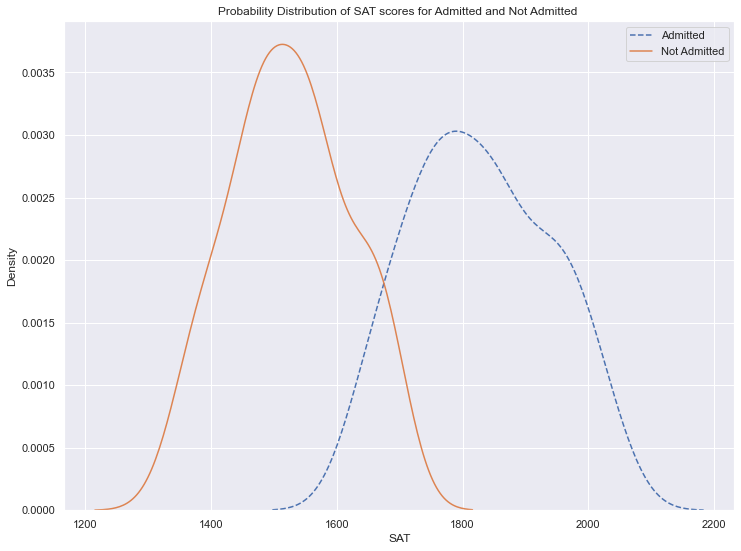

In [28]:
plt.figure(figsize=(12,9))

sns.distplot(data[(data['Admitted']=='Yes')]['SAT'],
             hist=False,
             kde_kws={'linestyle':'--','label':'Admitted'})

sns.distplot(data[(data['Admitted']=='No')]['SAT'],
             hist=False,
             kde_kws={'linestyle':'-','label':'Not Admitted'})
plt.title('Probability Distribution of SAT scores for Admitted and Not Admitted ')
plt.legend()

In [29]:
admission_statistics(low=1500,high=1800)

 For scores between 1500 and 1800
 Population of Both Gender applicants: 84
 No admitted: 41
 Percentage admitted: 48.81%


In [30]:
admission_statistics(Gender="Male",low=1500,high=1800)

 For scores between 1500 and 1800
 Population of Male applicants: 44
 No admitted: 11
 Percentage admitted: 25.0%


In [31]:
admission_statistics(Gender="Female",low=1500,high=1800)

 For scores between 1500 and 1800
 Population of Female applicants: 40
 No admitted: 30
 Percentage admitted: 75.0%


## Data Preprocessing (Encoding)
The Data consists of one numerical column (SAT scores) and two categorical column (Admitted and Gender)                
In the Admitted column, $Yes$ values are converted to $1$'s and $No$ values are conerted to $0$'s                                 
In the Gender column, $Male$ values are converted to $1$'s and $Female$ values are converted to $0$'s

We could also choose to standardize the SAT columns (I have tried this and the results are the same).

In [32]:
data_preprocessed = data.copy()

In [33]:
data_preprocessed['Admitted'] = data['Admitted'].map({'Yes':1,'No':0})
data_preprocessed['Gender'] = data['Gender'].map({'Male':1,'Female':0})

## More Analysis

In [34]:
y = data_preprocessed['Admitted']
x1 = data_preprocessed['SAT']

Text(0.5, 1.0, 'Admission Status vs SAT Score')

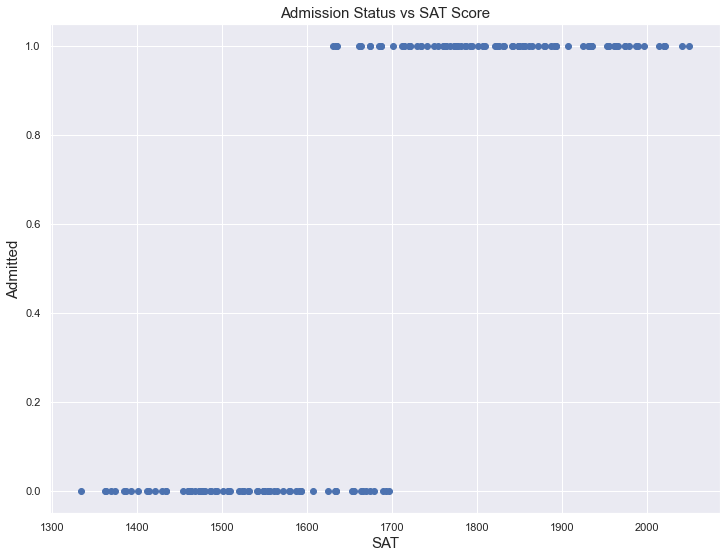

In [35]:
plt.figure(figsize=(12,9))
plt.scatter(x1,y, color = 'C0')
plt.xlabel('SAT', fontsize = 15)
plt.ylabel('Admitted', fontsize = 15)
plt.title("Admission Status vs SAT Score", fontsize=15)

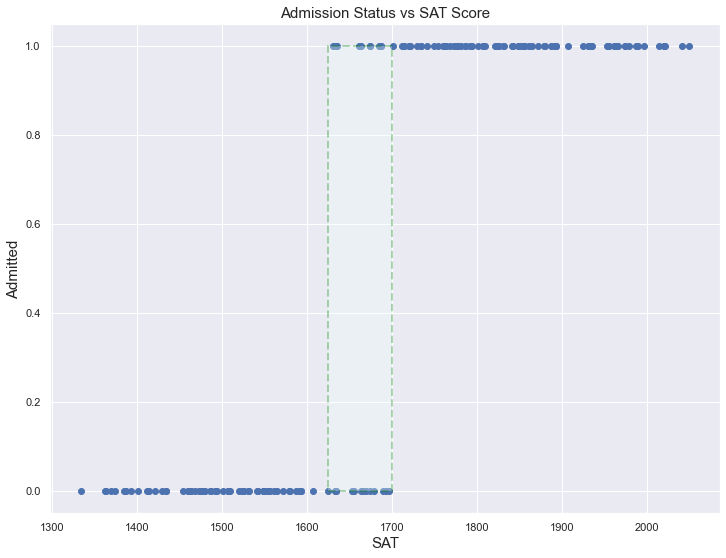

In [36]:
fig2 = plt.figure(figsize=(12,9))
ax = fig2.add_subplot(111)
plt.scatter(x1,y, color = 'C0')
plt.xlabel('SAT', fontsize = 15)
plt.ylabel('Admitted', fontsize = 15)
plt.title("Admission Status vs SAT Score", fontsize=15)
ax.add_patch(
patches.Rectangle(
(1625, 0), # (x,y)
75, # width
1, # height
alpha=0.3,facecolor="#F0FFFF", edgecolor="green", linewidth=2, linestyle='--'))

plt.show()

In [37]:
admission_statistics(low=1625,high=1700)

 For scores between 1625 and 1700
 Population of Both Gender applicants: 27
 No admitted: 12
 Percentage admitted: 44.44%


In [38]:
admission_statistics(low=1625,high=1700,group_by=True)

SAT
Gender Admitted     
Female No          3
       Yes         8
Male   No         12
       Yes         4

In [39]:
admission_statistics(Gender="Male",low=1625, high=1700)

 For scores between 1625 and 1700
 Population of Male applicants: 16
 No admitted: 4
 Percentage admitted: 25.0%


In [40]:
admission_statistics(Gender="Female",low=1625, high=1700)

 For scores between 1625 and 1700
 Population of Female applicants: 11
 No admitted: 8
 Percentage admitted: 72.73%


In [41]:

x = sm.add_constant(x1)
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


/Users/orukotanoluwatobiloba/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


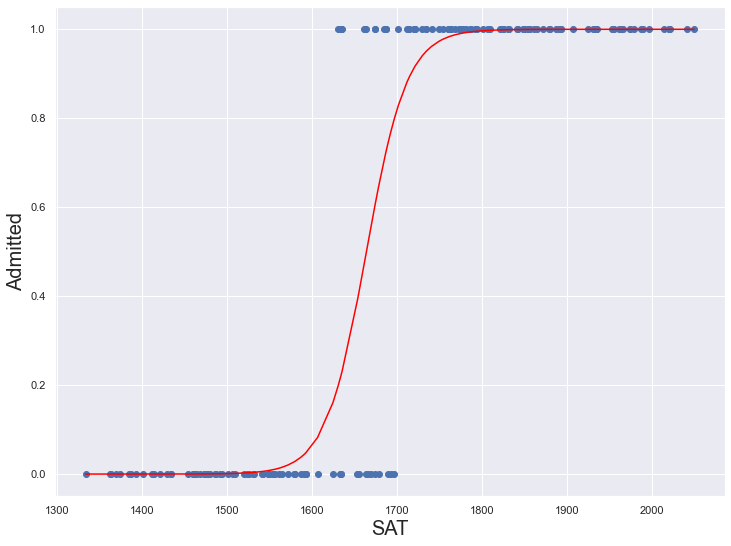

In [42]:
def log_y(x,b0,b1):
    return np.array((np.exp(b0 + b1*x))/ (1 + np.exp(b0 + b1*x)))

f_sorted = np.sort(log_y(x1,results_log.params[0],results_log.params[1]))
x_sorted = np.sort(np.array(x1))

plt.figure(figsize=(12,9))
plt.scatter(x1,y,color='C0')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('Admitted', fontsize = 20)
plt.plot(x_sorted,f_sorted,color='red')


plt.show()

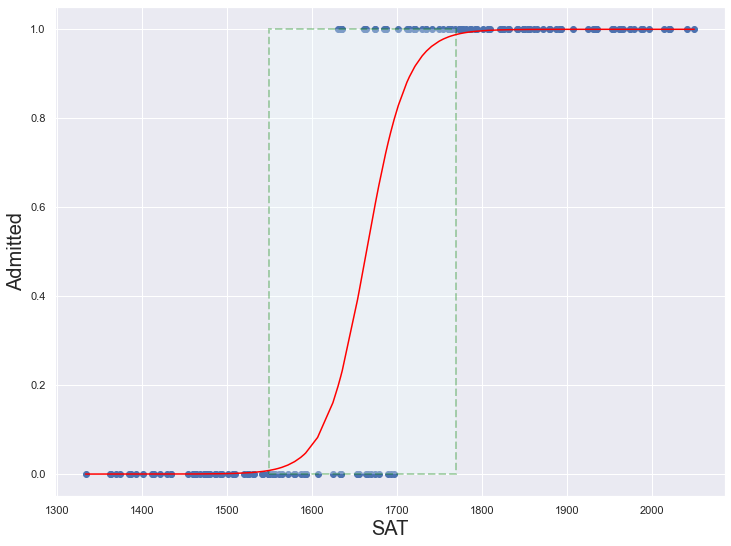

In [43]:
fig2 = plt.figure(figsize=(12,9))
ax = fig2.add_subplot(111)
plt.scatter(x1,y,color='C0')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('Admitted', fontsize = 20)
plt.plot(x_sorted,f_sorted,color='red')

ax.add_patch(
patches.Rectangle(
(1550, 0), # (x,y)
220, # width
1, # height
alpha=0.3,facecolor="#F0FFFF", edgecolor="green", linewidth=2, linestyle='--'))

plt.show()

- All student with SAT scores less than 1500 had a probability of being admitted, 0.
- All Students with SAT scores greater than 1770 had a probability of being admitted, 1.

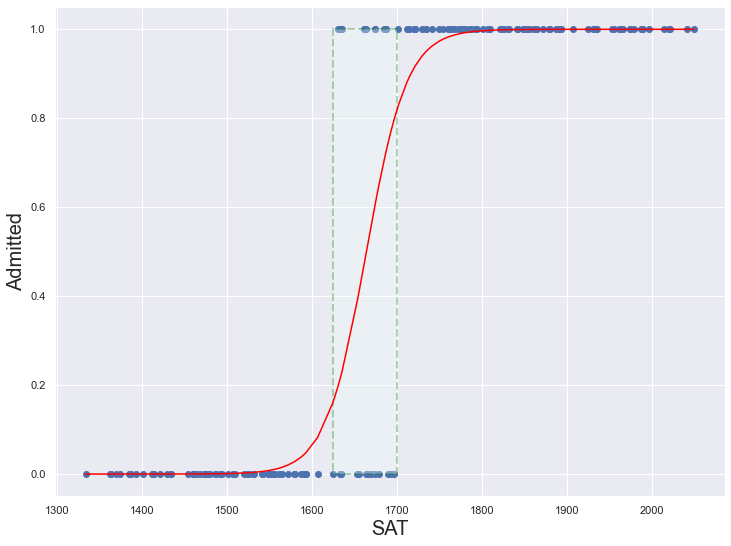

In [44]:
fig2 = plt.figure(figsize=(12,9))
ax = fig2.add_subplot(111)
plt.scatter(x1,y,color='C0')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('Admitted', fontsize = 20)
plt.plot(x_sorted,f_sorted,color='red')

ax.add_patch(
patches.Rectangle(
(1625, 0), # (x,y)
75, # width
1, # height
alpha=0.3,facecolor="#F0FFFF", edgecolor="green", linewidth=2, linestyle='--'))

plt.show()

In [45]:
results_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                            1
Date:                Mon, 25 Apr 2022   Pseudo R-squ.:                  0.7992
Time:                        16:03:58   Log-Likelihood:                -23.145
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.805e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -69.9128     15.737     -4.443      0.000    -100.756     -39.070
SAT            0.0420      0.009      4.454      0.000       0.024       0.060
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

We see that SAT score is a good pretictor of Admittance into the university from its p-value, the logistic reression curve, and the Probability Density Functions. However, if SAT scores were the sole determinant of Admittance, we would expect to see a complete separation rather than a complete quasi separation. In this case we see a complete quasi-separation with only 27% perfect predictions. Hence, some other factor may contribute to determining admittance in the remaining 73%. 

Let's see how the previous model compares to another that uses both SAT Score and Gender for Admittance.

In [46]:
new_x = data_preprocessed[["SAT","Gender"]]
new_x = sm.add_constant(new_x)
reg_log = sm.Logit(y,new_x)
results_log = reg_log.fit()
results_log.summary()

Optimization terminated successfully.
         Current function value: 0.120117
         Iterations 10


/Users/orukotanoluwatobiloba/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      165
Method:                           MLE   Df Model:                            2
Date:                Mon, 25 Apr 2022   Pseudo R-squ.:                  0.8249
Time:                        16:03:58   Log-Likelihood:                -20.180
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.118e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -66.4040     16.321     -4.068      0.000     -98.394     -34.414
SAT            0.0406      0.010      4.129      0.000       0.021       0.060
Gender        -1.9449      0.846     -2.299      0.022      -3.603      -0.287
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

$log(odds) = -66.4040 + 0.0406(SAT) -1.9449(Gender) -----(i)$ 

Recall, there  are  two  genders, Male and Female.                                                                                                                                                                                           


Let Female be $Gender_{1}$ and Male be $Gender_{2}$

$log(odds)_{1} = -66.4040 + 0.0406(SAT_{1}) -1.9449(Gender_{1})  -----(ii)$

$log(odds)_{2} = -66.4040 + 0.0406(SAT_{2}) -1.9449(Gender_{2}) -----(iii)$ 

Recall, Male ($Gender_{2}$) was mapped to 1 and Female ($Gender_{1}$) was mapped to 0

subtract (ii) from (iii)

$log(odds)_{2} - log(odds)_{1} =0.0406(SAT_{2}-SAT_{1}) - 1.9449(Gender_{2}-Gender_{1})-----(iv)$

$log\frac{odds_{2}}{odds{1}} = -1.9449(1-0)-----(v)$

$log\frac{odds_{Male}}{odds{Female}} = -1.9449-----(vi)$

$\frac{odds_{Male}}{odds_{Female}} = e^{-1.9449}-----(vii)$

$\frac{odds_{Male}}{odds_{Female}} = 0.1430015228-----(viii)$

$odds_{Female} = 6.993(odds_{Male}) $

From our analysis, females have a 7 times odds of getting admitted into this university.                              
This $could$ be as a result to encourage females to study in male dominated fields.